## Hoops and Stats: Unveiling the Secrets of NCAA Basketball Success

### By Daniel Lightner and Marcus Amerine

The College Basketball Dataset consists of statistics from NCAA Division I basketball teams across the 2013 to 2023 seasons, excluding the 2020 season, which was not played due to the Coronavirus pandemic. This dataset combines data from the 2013-2019 seasons and the 2021-2023 seasons. It includes a variety of performance metrics, such as adjusted offensive and defensive efficiency, shooting percentages, and wins. Analyzing this dataset allows us to uncover factors that contribute to a team's success in the NCAA tournament.

All of the variables within the cbb.csv file

- **TEAM**: The name of the Division I college basketball school.
- **CONF**: The Athletic Conference in which the school participates (e.g., ACC, Big Ten).
- **G**: Total number of games played by the team in the season.
- **W**: Total number of games won by the team in the season.
- **ADJOE**: Adjusted Offensive Efficiency; a measure of points scored per 100 possessions against average defenses.
- **ADJDE**: Adjusted Defensive Efficiency; a measure of points allowed per 100 possessions against average offenses. 
- **BARTHAG**: Power Rating indicating the team's chance of beating an average Division I team.
- **EFG_O**: Effective Field Goal Percentage for shots taken by the team.
- **EFG_D**: Effective Field Goal Percentage allowed by the team.
- **TOR**: Turnover Percentage Allowed; the rate at which opponents commit turnovers against the team.
- **TORD**: Turnover Percentage Committed; the rate at which the team commits turnovers.
- **ORB**: Offensive Rebound Rate; the percentage of available offensive rebounds secured by the team.
- **DRB**: Defensive Rebound Rate; the percentage of available defensive rebounds secured by the team.
- **FTR**: Free Throw Rate; the frequency with which the team shoots free throws per field goal attempt.
- **FTRD**: Free Throw Rate Allowed; the frequency with which opponents shoot free throws against the team.
- **2P_O**: Two-Point Shooting Percentage for shots taken by the team.
- **2P_D**: Two-Point Shooting Percentage allowed by the team.
- **3P_O**: Three-Point Shooting Percentage for shots taken by the team.
- **3P_D**: Three-Point Shooting Percentage allowed by the team.
- **ADJ_T**: Adjusted Tempo; an estimate of possessions per 40 minutes against average tempo.
- **WAB**: Wins Above Bubble; indicates how many wins above the cut-off for NCAA tournament qualification a team has.
- **POSTSEASON**: The round in which the team was eliminated in the NCAA tournament (e.g., R64, S16).
- **SEED**: The seed assigned to the team in the NCAA March Madness Tournament.
- **YEAR**: The season year of the data (e.g., 2021).


### Key Variables for Analysis - These variables are important because they will be explored further (either here or later).

- **ADJOE**: Adjusted Offensive Efficiency; helps evaluate a team's scoring capabilities against average defenses.
- **ADJDE**: Adjusted Defensive Efficiency; provides insight into how well a team prevents scoring against average offenses.
- **WAB**: Wins Above Bubble; indicates a team's performance relative to the NCAA tournament qualification threshold.
- **SEED**: The seed assigned to a team in the NCAA tournament, reflecting their perceived strength.
- **POSTSEASON**: The round where the team was eliminated, indicating tournament success.
- **EFG_O**: Effective Field Goal Percentage for shots taken by the team; a crucial metric for shooting efficiency.
- **3P_O**: Three-Point Shooting Percentage; important for understanding a team's ability to score from beyond the arc.
- **ADJ_T**: Adjusted Tempo; assesses the pace of play and how it may affect game outcomes.
- **BARTHAG**: Power Rating; offers a comparative measure of a team's strength against average Division I teams.
- **FTR**: Free Throw Rate; shows how often a team capitalizes on free throw opportunities, affecting overall scoring.



If you are interested in viewing it yourself, feel free to take a look at it: https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset

In [1]:
import pandas as pd
df = pd.read_csv('cbb.csv')

In [2]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

POSTSEASON    2843
SEED          2843
dtype: int64


### Variables of Interest

**1. Adjusted Offensive Efficiency (ADJOE)**
- **Importance**: ADJOE is crucial for understanding how effectively a team can score against average defenses. It helps identify offensive strengths and weaknesses, which are vital for predicting tournament performance.
- **Questions for Future Analysis**:
  - How does ADJOE correlate with a team's postseason success?
  - Does a higher ADJOE significantly improve a team's chances of advancing past the first round of the NCAA tournament?
  - How does ADJOE vary between different conferences?

**2. Adjusted Defensive Efficiency (ADJDE)**
- **Importance**: ADJDE measures a team's ability to prevent scoring against average offenses. Analyzing this variable can help us understand defensive strategies that contribute to winning games.
- **Questions for Future Analysis**:
  - What is the relationship between ADJDE and the number of wins a team achieves in the regular season?
  - How does ADJDE influence a team's performance in high-stakes tournament games?
  - Are teams with higher ADJDE less likely to be eliminated early in the NCAA tournament?

**3. Wins Above Bubble (WAB)**
- **Importance**: WAB indicates how a team's performance stacks up against the cutoff for NCAA tournament qualification. It provides insights into teams' standings and their likelihood of making the postseason.
- **Questions for Future Analysis**:
  - How do WAB scores differ across various conferences and what does this suggest about their competitiveness?
  - Can WAB be used to predict future tournament appearances for teams over several seasons?
  - What role does WAB play in determining seeding for the NCAA tournament?


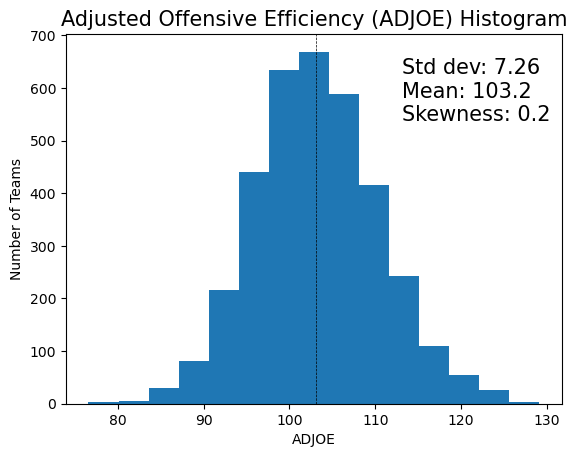

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(df.ADJOE, bins=int(round(df.ADJOE.count()**(1/3),0)))
text = 'Std dev: ' + str(round(df.ADJOE.std(), 2)) + '\n' + 'Mean: ' + str(round(df.ADJOE.mean(), 1)) + '\n' + 'Skewness: ' + str(round(df.ADJOE.skew(), 1))
plt.text(0.65, 0.7, text, fontsize=15, transform=plt.gcf().transFigure)
plt.title("Adjusted Offensive Efficiency (ADJOE) Histogram", fontsize=15)
plt.xlabel("ADJOE")
plt.ylabel("Number of Teams")
plt.axvline(df.ADJOE.mean(), color='k', linestyle='dashed', linewidth=0.5)
plt.show()


The ADJOE variables appears to be normally distributed, following that bell curve shape. Its skewness is 0.2, meaning it's almost close to symmetrical.

In [4]:
df['ADJOE'].isnull().sum()

0

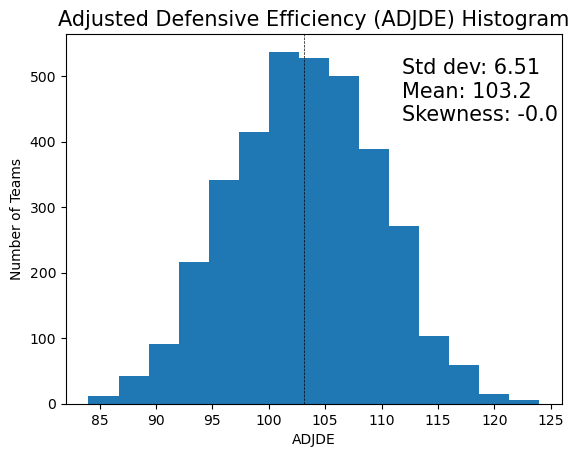

In [5]:
plt.hist(df.ADJDE, bins=int(round(df.ADJDE.count()**(1/3),0)))
text = 'Std dev: ' + str(round(df.ADJDE.std(), 2)) + '\n' + 'Mean: ' + str(round(df.ADJDE.mean(), 1)) + '\n' + 'Skewness: ' + str(round(df.ADJDE.skew(), 1))
plt.text(0.65, 0.7, text, fontsize=15, transform=plt.gcf().transFigure)
plt.title("Adjusted Defensive Efficiency (ADJDE) Histogram", fontsize=15)
plt.xlabel("ADJDE")
plt.ylabel("Number of Teams")
plt.axvline(df.ADJDE.mean(), color='k', linestyle='dashed', linewidth=0.5)
plt.show()


The ADJDE variable appears to be normally distributed. The skewness is 0.0, meaning its almost perfectly symmetrical.

In [6]:
df['ADJDE'].isnull().sum()

0

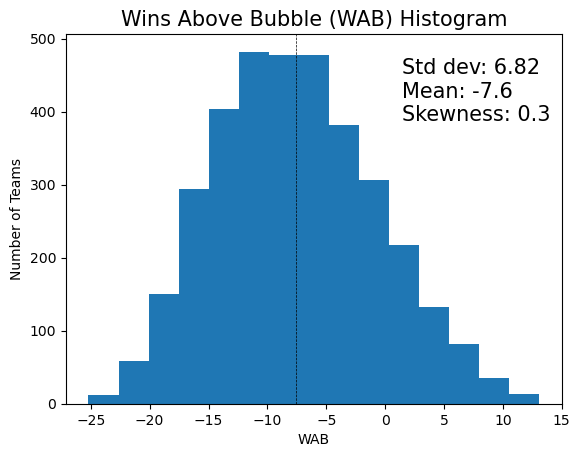

In [7]:

plt.hist(df.WAB, bins=int(round(df.WAB.count()**(1/3),0)))
text = 'Std dev: ' + str(round(df.WAB.std(), 2)) + '\n' + 'Mean: ' + str(round(df.WAB.mean(), 1)) + '\n' + 'Skewness: ' + str(round(df.WAB.skew(), 1))
plt.text(0.65, 0.7, text, fontsize=15, transform=plt.gcf().transFigure)
plt.title("Wins Above Bubble (WAB) Histogram", fontsize=15)
plt.xlabel("WAB")
plt.ylabel("Number of Teams")
plt.axvline(df.WAB.mean(), color='k', linestyle='dashed', linewidth=0.5)
plt.show()


The WAB variable has a standard deviation of 6.82 and a skewness of 0.3, indicating a slight positive skew. With a mean of -7.6, this suggests that while most teams are underperforming relative to the tournament cutoff, a few teams are performing significantly better, leading to a distribution that remains relatively normal.

In [8]:
df['WAB'].isnull().sum()


0

In [9]:
df_corr = df[['ADJOE', 'ADJDE', 'WAB']]
correlation_matrix = df_corr.corr(method='pearson')
print(correlation_matrix)


          ADJOE     ADJDE       WAB
ADJOE  1.000000 -0.494039  0.821904
ADJDE -0.494039  1.000000 -0.799711
WAB    0.821904 -0.799711  1.000000


In [10]:
from scipy.stats import pearsonr

# Sample correlation and p-value calculations between pairs
# For ADJOE and WAB
corr_adjoe_wab, p_value_adjoe_wab = pearsonr(df['ADJOE'], df['WAB'])
print(f"Correlation between ADJOE and WAB: {corr_adjoe_wab}, p-value: {p_value_adjoe_wab}")

# For ADJDE and WAB
corr_adjde_wab, p_value_adjde_wab = pearsonr(df['ADJDE'], df['WAB'])
print(f"Correlation between ADJDE and WAB: {corr_adjde_wab}, p-value: {p_value_adjde_wab}")

# For ADJOE and ADJDE
corr_adjoe_adjde, p_value_adjoe_adjde = pearsonr(df['ADJOE'], df['ADJDE'])
print(f"Correlation between ADJOE and ADJDE: {corr_adjoe_adjde}, p-value: {p_value_adjoe_adjde}")


Correlation between ADJOE and WAB: 0.8219042652940656, p-value: 0.0
Correlation between ADJDE and WAB: -0.7997105993662943, p-value: 0.0
Correlation between ADJOE and ADJDE: -0.49403865347608844, p-value: 3.140645596506229e-216


In [11]:
mean_adjoe = df['ADJOE'].mean()
elite_offensive_teams = df[df['ADJOE'] > mean_adjoe + 20][['TEAM', 'YEAR', 'ADJOE', 'ADJDE', 'WAB', 'EFG_O', 'EFG_D', 'W', 'G'] ]
elite_offensive_teams = elite_offensive_teams.sort_values(by='ADJOE', ascending=False)
print(elite_offensive_teams)


                TEAM  YEAR  ADJOE  ADJDE   WAB  EFG_O  EFG_D   W   G
1          Wisconsin  2015  129.1   93.6  11.3   54.8   47.7  36  40
11         Villanova  2018  128.4   94.1  10.6   59.5   48.5  36  40
2195    Oklahoma St.  2017  126.8  102.3   3.3   54.0   53.2  20  32
2307            Duke  2014  125.9   98.6   6.5   53.8   49.3  26  35
2458         Gonzaga  2021  125.4   89.8   8.5   61.0   47.5  26  26
15        Notre Dame  2015  125.3   98.6   8.6   58.3   47.9  32  38
2118       Creighton  2014  125.2  101.9   5.6   58.9   48.5  27  35
7               Duke  2015  125.2   90.6  10.7   56.6   46.5  35  39
35          Michigan  2014  125.0   99.9   7.7   55.7   49.4  28  37
2459            Iowa  2021  123.5   95.7   5.6   54.6   48.3  21  29
33           Gonzaga  2019  123.4   89.9   7.0   59.0   44.2  33  37
0     North Carolina  2016  123.3   94.9   8.6   52.6   48.1  33  40
2412        Michigan  2017  123.3   97.6   3.8   57.0   51.9  26  38
2415          Purdue  2018  123.2 

In [12]:
mean_adjde = df['ADJDE'].mean()
elite_defensive_teams = df[df['ADJDE'] > mean_adjde + 15][['TEAM', 'YEAR', 'ADJOE', 'ADJDE', 'WAB', 'EFG_O', 'EFG_D', 'W', 'G'] ]
elite_defensive_teams = elite_defensive_teams.sort_values(by='ADJDE', ascending=False)
print(elite_defensive_teams)


                        TEAM  YEAR  ADJOE  ADJDE   WAB  EFG_O  EFG_D   W   G
814       North Carolina A&T  2017   95.2  124.0 -25.2   47.6   53.1   3  30
1368             Alabama A&M  2017   90.4  123.6 -24.0   44.3   53.7   2  29
258              USC Upstate  2018  105.1  123.0 -19.5   50.1   59.5   7  28
1556           Grambling St.  2014   94.5  122.4 -19.3   46.5   57.4   4  27
1756           Grambling St.  2013   76.6  121.4 -24.3   41.1   52.2   0  28
2530  Mississippi Valley St.  2021   80.0  120.8 -17.5   43.6   55.0   2  24
1605  Maryland Eastern Shore  2014   99.2  120.6 -18.7   45.0   54.3   5  28
3282       Houston Christian  2023  100.5  120.2 -17.9   51.4   57.5  10  29
1170             The Citadel  2015  101.4  120.0 -14.7   51.7   55.1   8  27
956                   Bryant  2018   98.3  119.8 -23.0   47.9   57.6   3  31
3151     Arkansas Pine Bluff  2022   97.6  119.8 -17.4   46.6   55.5   7  29
1522                 Cornell  2014  101.2  119.4 -18.5   46.7   56.8   1  27

In [13]:
st_francis_stats = df[df['TEAM'] == 'Grambling St.']
relevant_columns = ['TEAM', 'YEAR', 'ADJOE', 'ADJDE', 'WAB', 'EFG_O', 'EFG_D', 'FTR', 'W', 'G', "SEED", "POSTSEASON"] 
st_francis_relevant_stats = st_francis_stats[relevant_columns]
st_francis_relevant_stats_sorted = st_francis_relevant_stats.sort_values(by='YEAR')
print(st_francis_relevant_stats)
#just playing with the data


               TEAM  YEAR  ADJOE  ADJDE   WAB  EFG_O  EFG_D   FTR   W   G  \
1354  Grambling St.  2015   76.7  117.0 -22.3   39.4   52.2  39.6   0  27   
1363  Grambling St.  2016   85.9  110.5 -19.7   43.8   50.8  44.2   4  28   
1372  Grambling St.  2017   94.7  112.9 -13.6   46.8   55.5  38.1  15  30   
1381  Grambling St.  2018   93.2  106.4 -10.0   45.6   49.1  40.7  17  30   
1390  Grambling St.  2019   94.9  104.0 -11.5   50.0   45.1  43.0  17  31   
1556  Grambling St.  2014   94.5  122.4 -19.3   46.5   57.4  40.5   4  27   
1756  Grambling St.  2013   76.6  121.4 -24.3   41.1   52.2  24.9   0  28   
2697  Grambling St.  2021   92.4  106.4  -9.2   47.8   46.8  41.9  12  23   
3126  Grambling St.  2022   92.1  106.4 -13.6   44.6   48.9  33.4  12  30   
3511  Grambling St.  2023   98.7   99.3  -4.6   50.0   44.6  41.5  24  31   

      SEED POSTSEASON  
1354   NaN        NaN  
1363   NaN        NaN  
1372   NaN        NaN  
1381   NaN        NaN  
1390   NaN        NaN  
1556   N

### Summary of Variable Analysis

The analysis of the three variables—Adjusted Offensive Efficiency (ADJOE), Adjusted Defensive Efficiency (ADJDE), and Wins Above Bubble (WAB)—reveals intriguing insights. While ADJOE and WAB show a strong positive correlation (0.82), suggesting that teams with better offensive efficiency are likely to have higher postseason prospects, the correlation between ADJDE and WAB is notably negative at -0.799. This indicates that teams with higher defensive efficiency might struggle to secure enough wins for a strong postseason position.

This relationship highlights an important point in basketball: a strong defense doesn’t guarantee tournament success. Teams with high Adjusted Defensive Efficiency (ADJDE) may excel at shutting down opponents but can struggle to score enough points to win games, much like a team that plays tough defense but can’t make shots. In NCAA basketball, where every game is crucial, balancing offensive firepower with solid defense is essential for postseason success. It’s also important to consider the level of competition teams face, as it can greatly impact performance. Teams in tougher conferences may need both strong offensive and defensive stats to stand out.


NOTE: We will definitely dive into more statistics such as tempo, 3pt shot attempts/makes, and much more.

In [14]:
st_francis_stats = df[df['TEAM'] == 'St. Francis PA']
relevant_columns = ['TEAM', 'YEAR', 'ADJOE', 'ADJDE', 'WAB', 'EFG_O', 'EFG_D', 'FTR', 'W', 'G', "SEED", "POSTSEASON"] 
st_francis_relevant_stats = st_francis_stats[relevant_columns]
st_francis_relevant_stats_sorted = st_francis_relevant_stats.sort_values(by='YEAR')
print(st_francis_relevant_stats)
#just playing with the data


                TEAM  YEAR  ADJOE  ADJDE   WAB  EFG_O  EFG_D   FTR   W   G  \
936   St. Francis PA  2015   97.9  101.8 -10.3   50.1   49.5  34.6  15  31   
945   St. Francis PA  2016   99.6  113.2 -13.5   48.3   50.8  38.5  12  29   
954   St. Francis PA  2017  101.5  109.1 -11.9   52.8   50.4  29.6  17  33   
963   St. Francis PA  2018  104.1  110.2  -7.7   52.8   53.6  33.5  18  29   
972   St. Francis PA  2019  104.9  112.3  -9.0   48.8   53.8  35.0  18  31   
1697  St. Francis PA  2014   95.8  110.7 -15.8   47.6   52.4  32.7  10  31   
1922  St. Francis PA  2013   92.1  111.2 -19.2   48.2   53.0  31.6   5  29   
2576  St. Francis PA  2021   94.7  107.2 -13.0   47.9   51.5  33.7   6  22   
3128  St. Francis PA  2022   94.5  109.5 -16.6   46.9   52.4  29.8   9  29   
3322  St. Francis PA  2023  100.7  115.1 -14.3   51.9   51.9  32.8  13  29   

      SEED POSTSEASON  
936    NaN        NaN  
945    NaN        NaN  
954    NaN        NaN  
963    NaN        NaN  
972    NaN        NaN

In [15]:
st_francis_stats = df[df['TEAM'] == 'Gonzaga']
relevant_columns = ['TEAM', 'YEAR', 'ADJOE', 'ADJDE', 'WAB', 'EFG_O', 'EFG_D', 'FTR', 'W', 'G', "SEED", "POSTSEASON"] 
st_francis_relevant_stats = st_francis_stats[relevant_columns]
st_francis_relevant_stats_sorted = st_francis_relevant_stats.sort_values(by='YEAR')
print(st_francis_relevant_stats)
#just playing with the data


         TEAM  YEAR  ADJOE  ADJDE  WAB  EFG_O  EFG_D   FTR   W   G  SEED  \
4     Gonzaga  2017  117.8   86.3  7.7   56.6   41.1  39.0  37  39   1.0   
32    Gonzaga  2015  120.2   93.1  7.8   57.9   44.2  38.7  34  37   2.0   
33    Gonzaga  2019  123.4   89.9  7.0   59.0   44.2  35.3  33  37   1.0   
2124  Gonzaga  2014  113.6   93.3  4.0   55.2   44.6  41.2  28  35   8.0   
2131  Gonzaga  2013  118.9   90.2  7.6   54.9   44.9  40.8  31  34   1.0   
2437  Gonzaga  2016  117.4   94.5  2.1   55.2   44.8  34.4  27  35  11.0   
2438  Gonzaga  2018  117.2   94.9  4.9   57.0   47.1  32.1  32  37   4.0   
2458  Gonzaga  2021  125.4   89.8  8.5   61.0   47.5  36.7  26  26   1.0   
2802  Gonzaga  2022  120.3   89.9  6.7   58.7   43.1  30.6  28  32   1.0   
3169  Gonzaga  2023  123.2   99.0  6.6   57.6   51.4  34.1  31  36   3.0   

     POSTSEASON  
4           2ND  
32           E8  
33           E8  
2124        R32  
2131        R32  
2437        S16  
2438        S16  
2458        2ND  
2

In [16]:
df.corr(numeric_only=True)

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
G,1.000000,0.608824,0.458818,-0.358563,0.470220,0.223691,-0.313113,-0.235440,0.009625,0.271317,...,0.187947,-0.051500,0.180954,-0.323567,0.200767,-0.162106,-0.074646,0.366441,-0.363497,-0.244136
W,0.608824,1.000000,0.736713,-0.655700,0.794127,0.590957,-0.585786,-0.439382,0.135311,0.309950,...,0.156508,-0.255937,0.551565,-0.521364,0.418986,-0.444215,-0.025344,0.859995,-0.540782,0.004553
ADJOE,0.458818,0.736713,1.000000,-0.494039,0.863203,0.723180,-0.306172,-0.597191,-0.121562,0.253776,...,0.095396,-0.307819,0.638174,-0.296911,0.559109,-0.193225,0.056921,0.821904,-0.744609,0.018464
ADJDE,-0.358563,-0.655700,-0.494039,1.000000,-0.841425,-0.195558,0.785367,0.172985,-0.269400,-0.291944,...,-0.082848,0.176116,-0.234620,0.711324,-0.068731,0.573964,0.195574,-0.799711,0.690730,0.020903
BARTHAG,0.470220,0.794127,0.863203,-0.841425,1.000000,0.532123,-0.611977,-0.447057,0.066780,0.304284,...,0.105000,-0.286142,0.504225,-0.564498,0.365767,-0.431831,-0.073865,0.930164,-0.827418,-0.000407
EFG_O,0.223691,0.590957,0.723180,-0.195558,0.532123,1.000000,-0.104251,-0.371265,-0.158853,-0.145350,...,-0.066600,-0.366404,0.892808,-0.086651,0.749952,-0.094635,0.108285,0.540421,-0.231130,0.140777
EFG_D,-0.313113,-0.585786,-0.306172,0.785367,-0.611977,-0.104251,1.000000,0.051693,-0.058905,-0.363482,...,-0.199835,0.067946,-0.128741,0.905281,-0.038543,0.720319,0.234568,-0.614681,0.367349,0.149291
TOR,-0.235440,-0.439382,-0.597191,0.172985,-0.447057,-0.371265,0.051693,1.000000,0.149789,0.172764,...,0.161506,0.284840,-0.307227,0.044391,-0.310053,0.043810,-0.067096,-0.436574,0.266311,-0.118077
TORD,0.009625,0.135311,-0.121562,-0.269400,0.066780,-0.158853,-0.058905,0.149789,1.000000,0.161732,...,0.112047,0.358317,-0.099908,-0.018906,-0.175285,-0.108381,-0.031180,0.111490,-0.002099,-0.109105
ORB,0.271317,0.309950,0.253776,-0.291944,0.304284,-0.145350,-0.363482,0.172764,0.161732,1.000000,...,0.334411,0.206197,-0.108346,-0.372845,-0.118274,-0.187496,-0.080415,0.306895,-0.293490,-0.291332


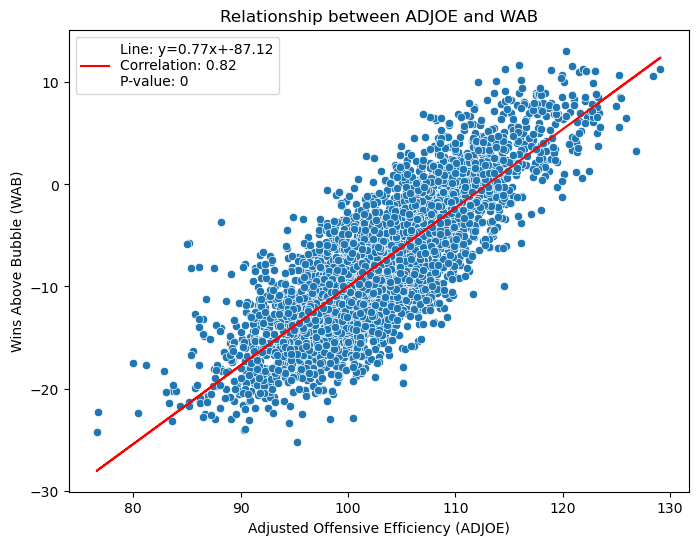

ADJOE vs. WAB: WAB = 0.77 * ADJOE + -87.12


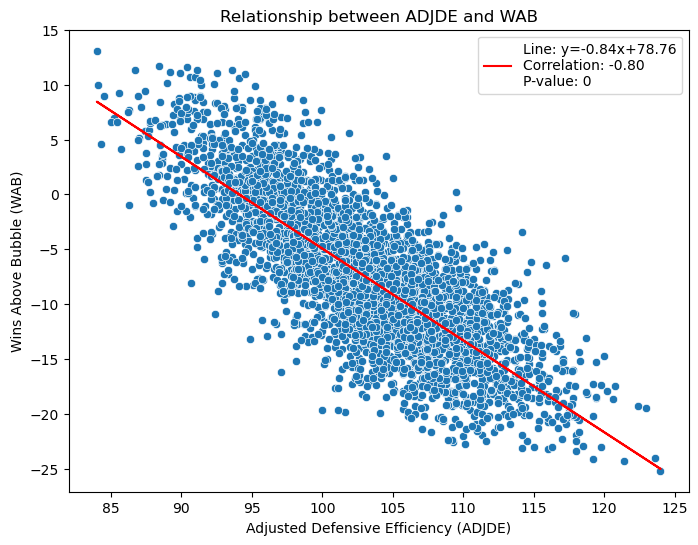

ADJDE vs. WAB: WAB = -0.84 * ADJDE + 78.76


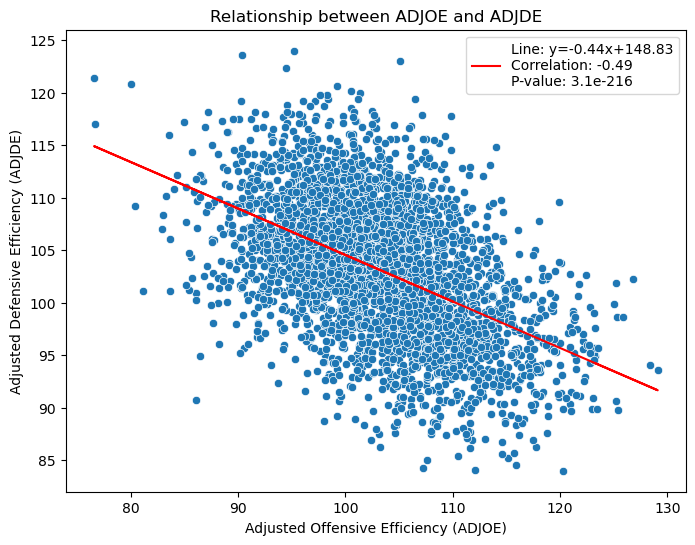

ADJOE vs. ADJDE: ADJDE = -0.44 * ADJOE + 148.83


In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming data is stored in a DataFrame named `df`
# Filter for the relevant columns
relevant_data = df[['ADJOE', 'ADJDE', 'WAB']]

# Scatterplot 1: ADJOE vs. WAB
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ADJOE', y='WAB', data=relevant_data)
slope, intercept, r_value, p_value, std_err = linregress(relevant_data['ADJOE'], relevant_data['WAB'])
plt.plot(relevant_data['ADJOE'], intercept + slope * relevant_data['ADJOE'], 'r', label=f'Line: y={slope:.2f}x+{intercept:.2f}\nCorrelation: {r_value:.2f}\nP-value: {p_value:.2g}')
plt.title('Relationship between ADJOE and WAB')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins Above Bubble (WAB)')
plt.legend()
plt.show()

# Print the equation for ADJOE vs. WAB
print(f"ADJOE vs. WAB: WAB = {slope:.2f} * ADJOE + {intercept:.2f}")

# Scatterplot 2: ADJDE vs. WAB
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ADJDE', y='WAB', data=relevant_data)
slope, intercept, r_value, p_value, std_err = linregress(relevant_data['ADJDE'], relevant_data['WAB'])
plt.plot(relevant_data['ADJDE'], intercept + slope * relevant_data['ADJDE'], 'r', label=f'Line: y={slope:.2f}x+{intercept:.2f}\nCorrelation: {r_value:.2f}\nP-value: {p_value:.2g}')
plt.title('Relationship between ADJDE and WAB')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins Above Bubble (WAB)')
plt.legend()
plt.show()

# Print the equation for ADJDE vs. WAB
print(f"ADJDE vs. WAB: WAB = {slope:.2f} * ADJDE + {intercept:.2f}")

# Scatterplot 3: ADJOE vs. ADJDE
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ADJOE', y='ADJDE', data=relevant_data)
slope, intercept, r_value, p_value, std_err = linregress(relevant_data['ADJOE'], relevant_data['ADJDE'])
plt.plot(relevant_data['ADJOE'], intercept + slope * relevant_data['ADJOE'], 'r', label=f'Line: y={slope:.2f}x+{intercept:.2f}\nCorrelation: {r_value:.2f}\nP-value: {p_value:.2g}')
plt.title('Relationship between ADJOE and ADJDE')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Adjusted Defensive Efficiency (ADJDE)')
plt.legend()
plt.show()

# Print the equation for ADJOE vs. ADJDE
print(f"ADJOE vs. ADJDE: ADJDE = {slope:.2f} * ADJOE + {intercept:.2f}")


In [18]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan



# ADJOE and ADJDE
X1 = df[['ADJOE']]
y1 = df['ADJDE']
X1 = sm.add_constant(X1)
model1 = sm.OLS(y1, X1).fit()
white_test1 = het_white(model1.resid, model1.model.exog)
bp_test1 = het_breuschpagan(model1.resid, model1.model.exog)
print("ADJOE and ADJDE - White Test: LM Stat =", white_test1[0], ", p-value =", white_test1[1])
print("ADJOE and ADJDE - Breusch-Pagan Test: LM Stat =", bp_test1[0], ", p-value =", bp_test1[1])

# ADJOE and WAB
X2 = df[['ADJOE']]
y2 = df['WAB']
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2).fit()
white_test2 = het_white(model2.resid, model2.model.exog)
bp_test2 = het_breuschpagan(model2.resid, model2.model.exog)
print("ADJOE and WAB - White Test: LM Stat =", white_test2[0], ", p-value =", white_test2[1])
print("ADJOE and WAB - Breusch-Pagan Test: LM Stat =", bp_test2[0], ", p-value =", bp_test2[1])

# ADJDE and WAB
X3 = df[['ADJDE']]
y3 = df['WAB']
X3 = sm.add_constant(X3)
model3 = sm.OLS(y3, X3).fit()
white_test3 = het_white(model3.resid, model3.model.exog)
bp_test3 = het_breuschpagan(model3.resid, model3.model.exog)
print("ADJDE and WAB - White Test: LM Stat =", white_test3[0], ", p-value =", white_test3[1])
print("ADJDE and WAB - Breusch-Pagan Test: LM Stat =", bp_test3[0], ", p-value =", bp_test3[1])


ADJOE and ADJDE - White Test: LM Stat = 4.806555760698089 , p-value = 0.09042107752045925
ADJOE and ADJDE - Breusch-Pagan Test: LM Stat = 0.13764878183626683 , p-value = 0.7106297204177774
ADJOE and WAB - White Test: LM Stat = 7.157906894767467 , p-value = 0.027904886911254336
ADJOE and WAB - Breusch-Pagan Test: LM Stat = 7.121912457668405 , p-value = 0.0076147435115138055
ADJDE and WAB - White Test: LM Stat = 7.731376643200607 , p-value = 0.02094849816956974
ADJDE and WAB - Breusch-Pagan Test: LM Stat = 5.22728534908863 , p-value = 0.022235209631626236


In [19]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula='ADJOE~ADJDE', data=df).fit()
model.params

Intercept    160.004841
ADJDE         -0.551156
dtype: float64

In [20]:
white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)
output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test
output_df.round(5)

#PAGAN/WHITE TEST for ADJOE & ADJDE

,LM stat,LM p-value,F-stat,F p-value
White,12.30816,0.00212,6.17039,0.00211
Breusch-Pagan,12.16745,0.00049,12.20268,0.00048


In [21]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula='ADJOE~WAB', data=df).fit()
model.params


white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)
output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test
output_df.round(5)

#PAGAN/WHITE TEST for ADJOE & WAB

,LM stat,LM p-value,F-stat,F p-value
White,3.30374,0.19169,1.65201,0.19181
Breusch-Pagan,0.88007,0.34818,0.87979,0.34832


In [22]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula='ADJDE~WAB', data=df).fit()
model.params


white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)
output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test
output_df.round(5)

#PAGAN/WHITE TEST for ADJDE & WAB

,LM stat,LM p-value,F-stat,F p-value
White,10.38869,0.00555,5.20527,0.00553
Breusch-Pagan,10.36988,0.00128,10.39459,0.00128


## Hoops and Stats: Unveiling the Secrets of NCAA Basketball Success Pt. 2

In our previous PowerPoint, we thought to include some of the following for future analysis: 
- **ADJOE with ADJ_T and 3P_O**: Correlating offensive efficiency with adjusted tempo and three-point shooting to assess effectiveness.​
- **WAB, SEED, and POSTSEASON**: Analyzing Wins Above Bubble's impact on tournament seeding and postseason success.​
- **ADJDE and EFG_D**: Evaluating the link between defensive efficiency and effective field goal percentage allowed.​
- Additionally, examining how conference performance affects these variables will provide further insights into team dynamics and success rates.​

​



### Variables of Interest

**1. Adjusted Offensive Efficiency (ADJOE) and Adjusted Tempo (ADJ_T)**
- **Importance**:  
  The interaction between ADJOE and ADJ_T reveals how offensive efficiency aligns with the pace of play. This is key to understanding whether faster or slower tempos complement high-scoring offenses.
- **Questions for Future Analysis**:  
  - Does a higher tempo enhance the impact of ADJOE on postseason success?  
  - Are teams with high ADJOE more likely to adopt faster tempos?  
  - How does the balance between ADJOE and ADJ_T vary across conferences?

**2. Adjusted Offensive Efficiency (ADJOE) and Three-Point Shooting (3P_O)**
- **Importance**:  
  This relationship highlights the role of three-point shooting in improving offensive efficiency, helping evaluate teams' reliance on perimeter scoring.
- **Questions for Future Analysis**:  
  - Does a high 3P_O consistently lead to stronger ADJOE values?  
  - Are teams with high ADJOE and strong three-point shooting more successful in tournaments?  
  - How does reliance on three-point shooting differ among conferences with varying ADJOE?

**3. Adjusted Tempo (ADJ_T) and Three-Point Shooting (3P_O)**
- **Importance**:  
  Analyzing ADJ_T with 3P_O helps determine if faster tempos enhance or hinder three-point accuracy, providing insights into strategic trade-offs.
- **Questions for Future Analysis**:  
  - Does a faster tempo reduce three-point efficiency in high-pressure games?  
  - How does the relationship between ADJ_T and 3P_O impact overall team performance?  
  - Do teams with a focus on 3P_O tend to adopt slower or faster tempos?


For now, we'll just dig into **ADJOE with ADJ_T and 3P_O**, **ADJDE and EFG_D**, and **look into conference play** later.

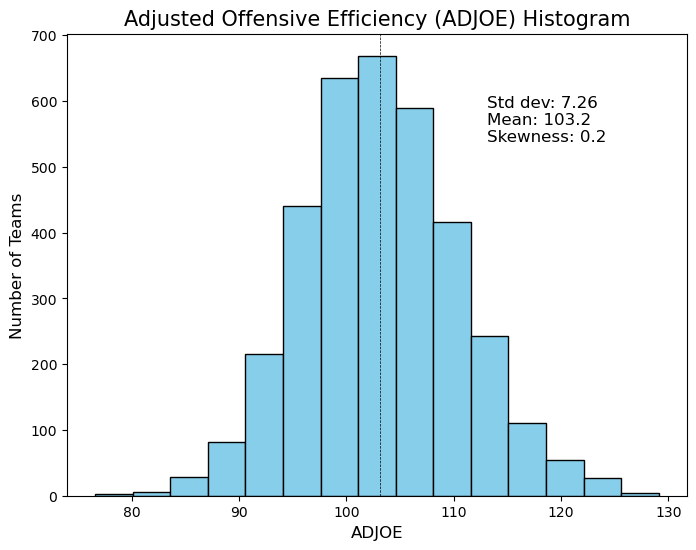

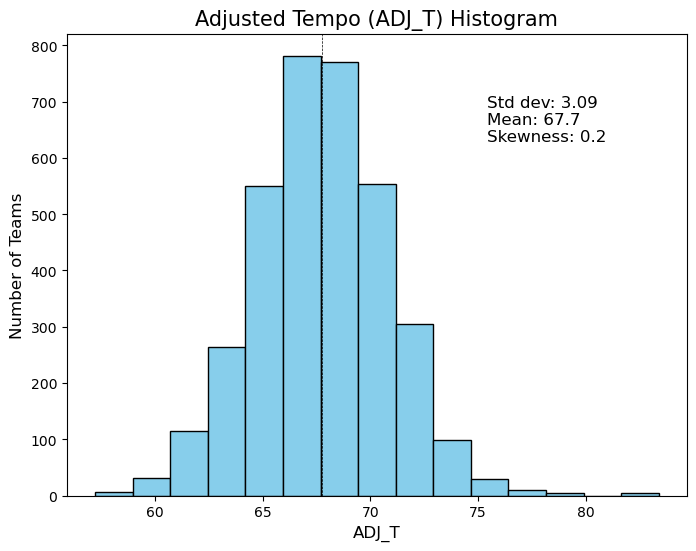

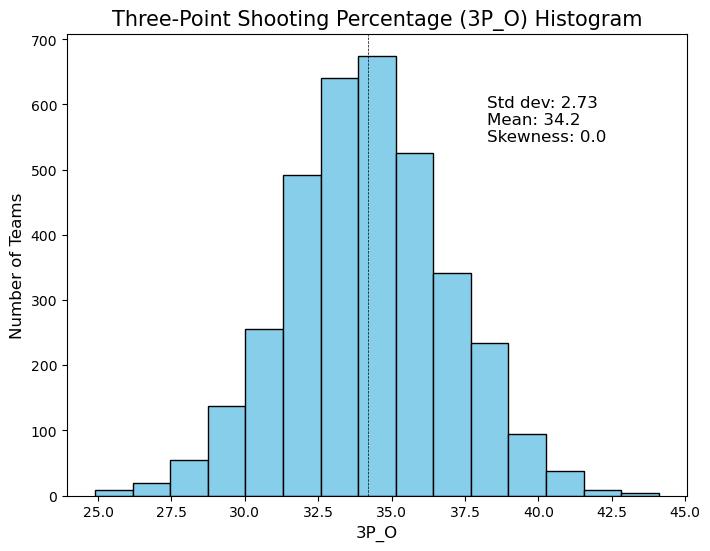

In [23]:
variables = ['ADJOE', 'ADJ_T', '3P_O']
titles = ['Adjusted Offensive Efficiency (ADJOE)', 'Adjusted Tempo (ADJ_T)', 'Three-Point Shooting Percentage (3P_O)']

for i, var in enumerate(variables):
    plt.figure(figsize=(8, 6))
    plt.hist(df[var], bins=int(round(df[var].count()**(1/3), 0)), color='skyblue', edgecolor='black')
    
    # Add text with statistics
    text = (f'Std dev: {round(df[var].std(), 2)}\n'
            f'Mean: {round(df[var].mean(), 1)}\n'
            f'Skewness: {round(df[var].skew(), 1)}')
    plt.text(0.65, 0.7, text, fontsize=12, transform=plt.gcf().transFigure)
    
    # Add title, labels, and mean line
    plt.title(f"{titles[i]} Histogram", fontsize=15)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Number of Teams", fontsize=12)
    plt.axvline(df[var].mean(), color='k', linestyle='dashed', linewidth=0.5)
    plt.show()


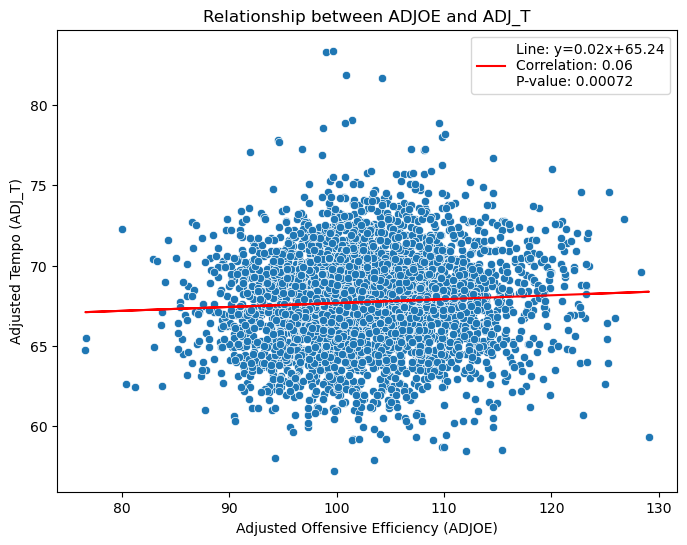

ADJOE vs. ADJ_T: ADJ_T = 0.02 * ADJOE + 65.24


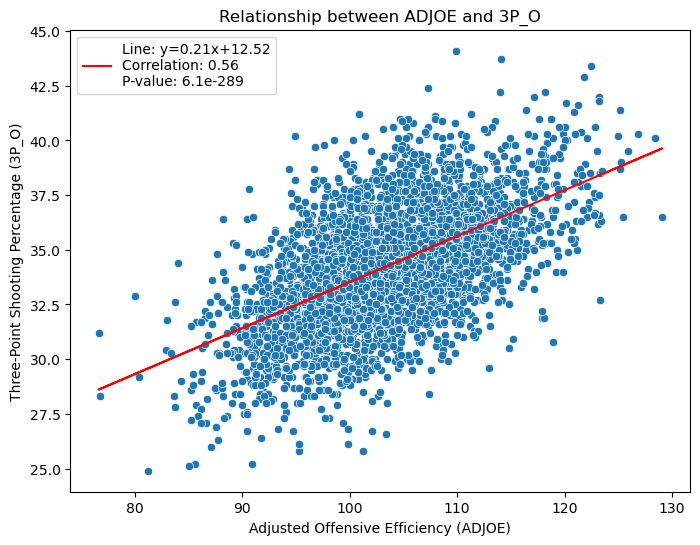

ADJOE vs. 3P_O: 3P_O = 0.21 * ADJOE + 12.52


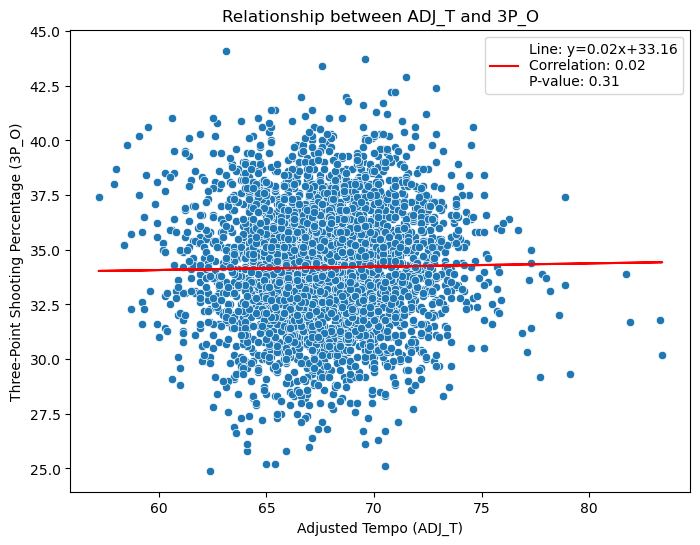

ADJ_T vs. 3P_O: 3P_O = 0.02 * ADJ_T + 33.16


In [24]:
# Filter for the relevant columns
relevant_data = df[['ADJOE', 'ADJ_T', '3P_O']]

# Scatterplot 1: ADJOE vs. ADJ_T
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ADJOE', y='ADJ_T', data=relevant_data)
slope, intercept, r_value, p_value, std_err = linregress(relevant_data['ADJOE'], relevant_data['ADJ_T'])
plt.plot(relevant_data['ADJOE'], intercept + slope * relevant_data['ADJOE'], 'r', label=f'Line: y={slope:.2f}x+{intercept:.2f}\nCorrelation: {r_value:.2f}\nP-value: {p_value:.2g}')
plt.title('Relationship between ADJOE and ADJ_T')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Adjusted Tempo (ADJ_T)')
plt.legend()
plt.show()

# Print the equation for ADJOE vs. ADJ_T
print(f"ADJOE vs. ADJ_T: ADJ_T = {slope:.2f} * ADJOE + {intercept:.2f}")

# Scatterplot 2: ADJOE vs. 3P_O
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ADJOE', y='3P_O', data=relevant_data)
slope, intercept, r_value, p_value, std_err = linregress(relevant_data['ADJOE'], relevant_data['3P_O'])
plt.plot(relevant_data['ADJOE'], intercept + slope * relevant_data['ADJOE'], 'r', label=f'Line: y={slope:.2f}x+{intercept:.2f}\nCorrelation: {r_value:.2f}\nP-value: {p_value:.2g}')
plt.title('Relationship between ADJOE and 3P_O')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Three-Point Shooting Percentage (3P_O)')
plt.legend()
plt.show()

# Print the equation for ADJOE vs. 3P_O
print(f"ADJOE vs. 3P_O: 3P_O = {slope:.2f} * ADJOE + {intercept:.2f}")

# Scatterplot 3: ADJ_T vs. 3P_O
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ADJ_T', y='3P_O', data=relevant_data)
slope, intercept, r_value, p_value, std_err = linregress(relevant_data['ADJ_T'], relevant_data['3P_O'])
plt.plot(relevant_data['ADJ_T'], intercept + slope * relevant_data['ADJ_T'], 'r', label=f'Line: y={slope:.2f}x+{intercept:.2f}\nCorrelation: {r_value:.2f}\nP-value: {p_value:.2g}')
plt.title('Relationship between ADJ_T and 3P_O')
plt.xlabel('Adjusted Tempo (ADJ_T)')
plt.ylabel('Three-Point Shooting Percentage (3P_O)')
plt.legend()
plt.show()

# Print the equation for ADJ_T vs. 3P_O
print(f"ADJ_T vs. 3P_O: 3P_O = {slope:.2f} * ADJ_T + {intercept:.2f}")


In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

# Function to perform White and Breusch-Pagan tests
def perform_tests(X_var, y_var, df, x_label, y_label):
    X = df[[X_var]]
    y = df[y_var]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    white_test = het_white(model.resid, model.model.exog)
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    
    print(f"{x_label} and {y_label} - White Test: LM Stat = {white_test[0]}, p-value = {white_test[1]}")
    print(f"{x_label} and {y_label} - Breusch-Pagan Test: LM Stat = {bp_test[0]}, p-value = {bp_test[1]}")
    print("")

# Perform tests for the new variable pairs
perform_tests('ADJOE', 'ADJ_T', df, 'ADJOE', 'ADJ_T')
perform_tests('ADJOE', '3P_O', df, 'ADJOE', '3P_O')
perform_tests('ADJ_T', '3P_O', df, 'ADJ_T', '3P_O')


ADJOE and ADJ_T - White Test: LM Stat = 1.4470974937462848, p-value = 0.48502795677390576
ADJOE and ADJ_T - Breusch-Pagan Test: LM Stat = 0.9816341075865324, p-value = 0.3217957040584334

ADJOE and 3P_O - White Test: LM Stat = 0.2704288620838319, p-value = 0.8735285799603392
ADJOE and 3P_O - Breusch-Pagan Test: LM Stat = 0.013744739612768675, p-value = 0.9066714854142739

ADJ_T and 3P_O - White Test: LM Stat = 8.588030541973303, p-value = 0.013650006638877265
ADJ_T and 3P_O - Breusch-Pagan Test: LM Stat = 7.200018230316671, p-value = 0.007290284032911227



For **ADJOE and ADJ_T** as well as **ADJOE and 3P_O**, the p-values for both White and Breusch-Pagan tests are greater than 0.05, indicating no evidence of heteroscedasticity. Thus, the assumption of equal variance is met.  

However, for **ADJ_T and 3P_O**, the p-values for both tests are below 0.05, suggesting heteroscedasticity and that the assumption of equal variance is violated.

### Analysis of Relationships Between ADJOE, ADJ_T, and 3P_O

The analysis of the relationships between **Adjusted Offensive Efficiency (ADJOE)**, **Adjusted Tempo (ADJ_T)**, and **Three-Point Shooting Percentage (3P_O)** reveals some interesting insights. 

- **ADJ_T and 3P_O**: The correlation between these two variables is very weak (**0.02**), with a p-value of **0.31**, suggesting there is **no meaningful relationship** between tempo and three-point shooting.
  
- **ADJOE and 3P_O**: In contrast, the relationship between ADJOE and 3P_O shows a **moderate positive correlation** (**0.56**), with a **highly statistically significant p-value of 6.1e-289**. This indicates that teams with **higher offensive efficiency** tend to have **better three-point shooting percentages**, suggesting a strong offense is linked to better shooting performance.

- **ADJOE and ADJ_T**: The relationship between these two variables shows a **very weak correlation** of **0.06**, though it is **statistically significant** with a p-value of **0.00072**. This weak correlation suggests a **small linear relationship** between offensive efficiency and tempo, meaning teams with higher offensive efficiency may slightly prefer a faster tempo, but the effect is minimal.

### Conclusion:
Overall, the strongest and most meaningful relationship is between **ADJOE and 3P_O**, emphasizing that improving **offensive efficiency** can have a **significant impact** on **three-point shooting**. In contrast, the effects of **tempo** (ADJ_T) on the other variables are **less pronounced** and less impactful.


### Looking into **Conference play** with **Power Rating**

In [26]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
anova_model = ols('BARTHAG ~ C(CONF)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

tukey = pairwise_tukeyhsd(endog=df['BARTHAG'], groups=df['CONF'], alpha=0.05)
print(tukey.summary())


c:\Users\danli\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   A10    ACC   0.1727    0.0  0.0964   0.249   True
   A10     AE  -0.2877    0.0 -0.3745 -0.2009   True
   A10   ASun  -0.2758    0.0 -0.3618 -0.1898   True
   A10   Amer   0.0444 0.9898 -0.0403  0.1291  False
   A10    B10   0.1989    0.0  0.1211  0.2767   True
   A10    B12   0.2228    0.0  0.1381  0.3075   True
   A10     BE   0.1802    0.0  0.0974   0.263   True
   A10   BSky  -0.2827    0.0 -0.3642 -0.2011   True
   A10   BSth    -0.29    0.0 -0.3721 -0.2078   True
   A10     BW  -0.1943    0.0 -0.2798 -0.1089   True
   A10    CAA  -0.1775    0.0 -0.2615 -0.0936   True
   A10   CUSA  -0.1311    0.0 -0.2088 -0.0534   True
   A10    GWC  -0.4411    0.0 -0.7363 -0.1459   True
   A10   Horz  -0.2023    0.0 -0.2865 -0.1181   True
   A10    Ind  -0.1519    1.0  -0.803  0.4991  False
   A10    Ivy  -0.1546    0.0 -0.2485 -0.0607 

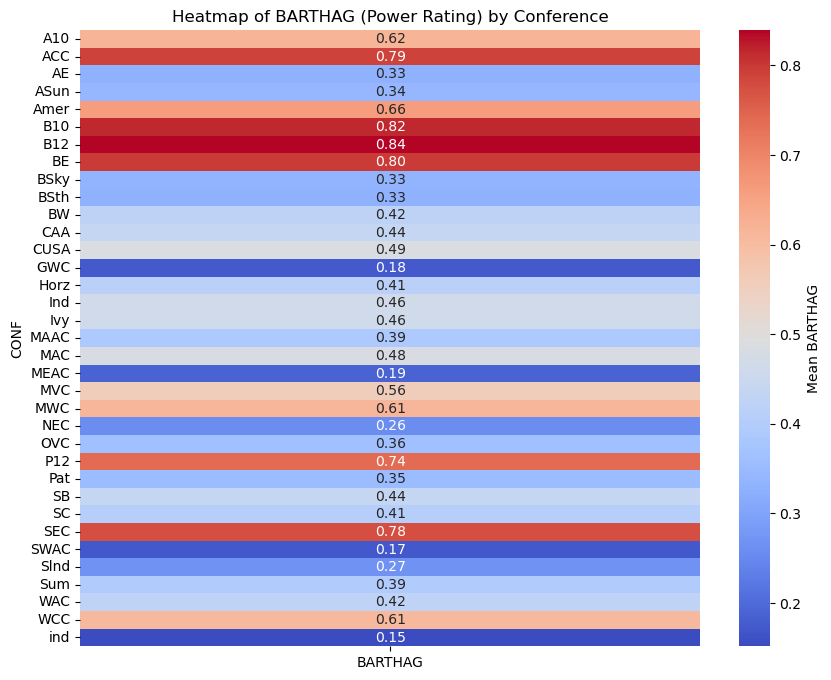

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
conference_barthag = df.groupby('CONF')['BARTHAG'].mean().reset_index()
heatmap_data = conference_barthag.pivot_table(index='CONF', values='BARTHAG')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Mean BARTHAG'})
plt.title('Heatmap of BARTHAG (Power Rating) by Conference')
plt.show()


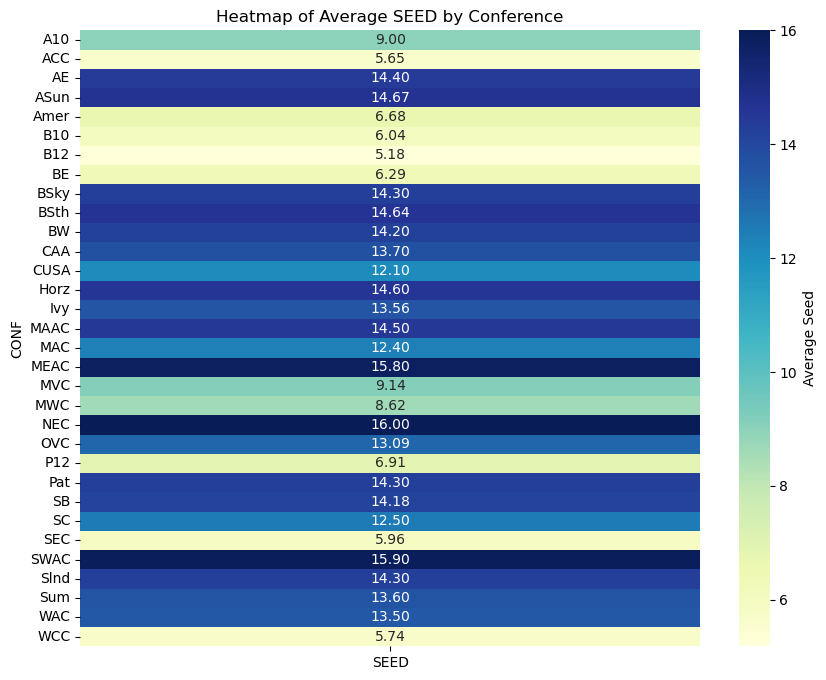

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by conference and calculate the mean SEED for each conference
conference_seed = df.groupby('CONF')['SEED'].mean().reset_index()

# Pivot the data to have conferences as rows and 'SEED' as values
heatmap_data = conference_seed.pivot_table(index='CONF', values='SEED')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Average Seed'})
plt.title('Heatmap of Average SEED by Conference')
plt.show()


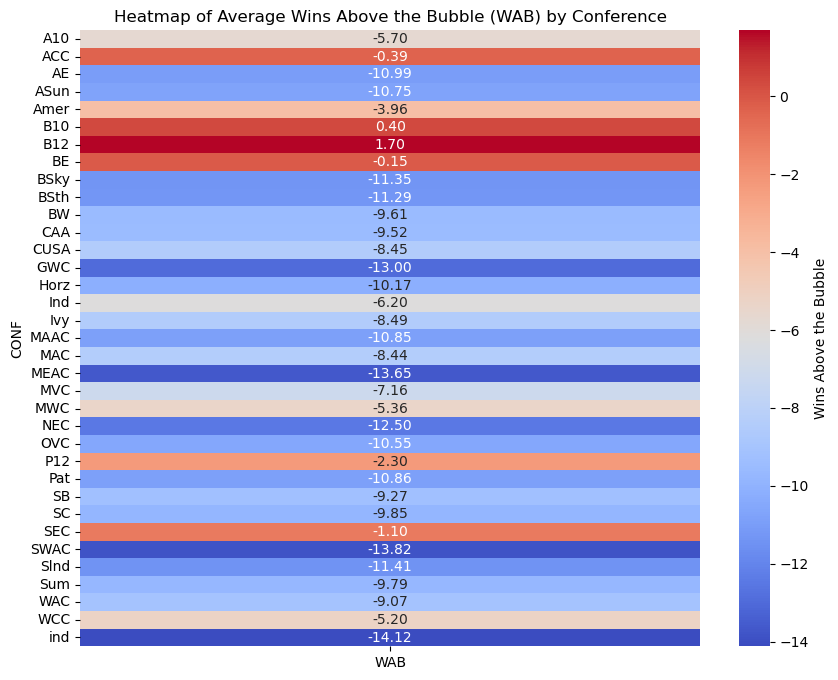

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by conference and calculate the mean Wins Above the Bubble (WAB) for each conference
conference_wab = df.groupby('CONF')['WAB'].mean().reset_index()

# Pivot the data to have conferences as rows and 'WAB' as values
heatmap_data = conference_wab.pivot_table(index='CONF', values='WAB')

# Create the heatmap with a red-to-green color map
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Wins Above the Bubble'})
plt.title('Heatmap of Average Wins Above the Bubble (WAB) by Conference')
plt.show()


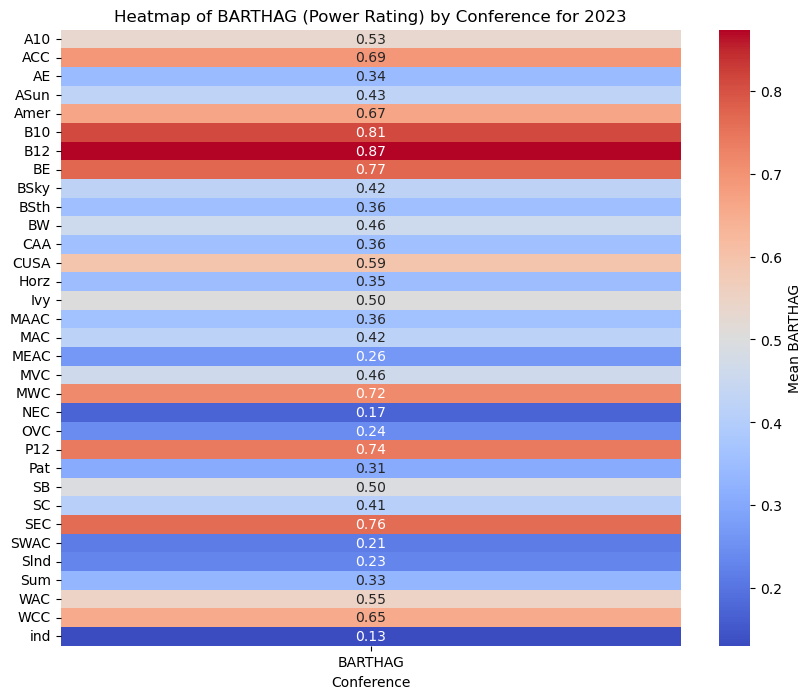

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the year 2023
conference_barthag_2023 = df[df['YEAR'] == 2023].groupby('CONF')['BARTHAG'].mean().reset_index()

# Prepare data for the heatmap
heatmap_data = conference_barthag_2023.pivot_table(index='CONF', values='BARTHAG')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Mean BARTHAG'})
plt.title('Heatmap of BARTHAG (Power Rating) by Conference for 2023')
plt.xlabel('Conference')
plt.ylabel('')
plt.show()
